In [109]:
#https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5
import pandas as pd #Data transformation
import numpy as np #Math (Vector calculation)
import matplotlib.pyplot as plt #Graphic's
import seaborn as sns #Graphic's
from sklearn import datasets, linear_model #ML
import statsmodels.formula.api as smf
import altair as alt #Graphic's #https://cmdlinetips.com/2019/12/barplots-scatter-plots-boxplots-with-altair-4-0/
print(pd.__version__)
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


0.25.3


In [110]:
#file = r'~/CAS_DA/regression/fallbeispiel_test/Autopreise.xlsx'
file = r'/Users/felix.baertschi/Documents/BFH/Regression/daten/Autopreise.xlsx'

df = pd.read_excel(file)
df.head()

,obs,Preis,Alter,KM
0,1,16990,"2,37",46200
1,2,14000,"3,38",92600
2,3,18000,"2,28",35000
3,4,14500,"3,38",73000
4,5,14100,"3,46",84400


In [111]:
df.describe()

,obs,Preis,KM
count,61.000000,61.000000,61.000000
mean,31.000000,16140.163934,53367.721311
std,17.752934,4029.834774,42556.395192
min,1.000000,6700.000000,1500.000000
25%,16.000000,14000.000000,22500.000000
50%,31.000000,16900.000000,35900.000000
75%,46.000000,18500.000000,75000.000000
max,61.000000,28400.000000,188000.000000


Replace "," with "."

In [112]:
df['Alter'] = df['Alter'].str.replace(',','.')
df.head()

,obs,Preis,Alter,KM
0,1,16990,2.37,46200
1,2,14000,3.38,92600
2,3,18000,2.28,35000
3,4,14500,3.38,73000
4,5,14100,3.46,84400


In [113]:
#convert string to int
df['Alter'] = df['Alter'].apply(float)
df.dtypes

obs        int64
Preis      int64
Alter    float64
KM         int64
dtype: object

Checking the diversity of the data. <br>
Do we have different datapoints?

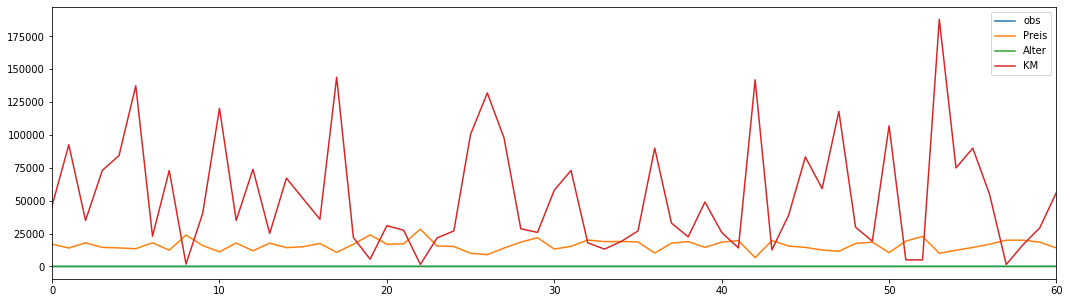

In [114]:
df.plot(figsize=(18,5))

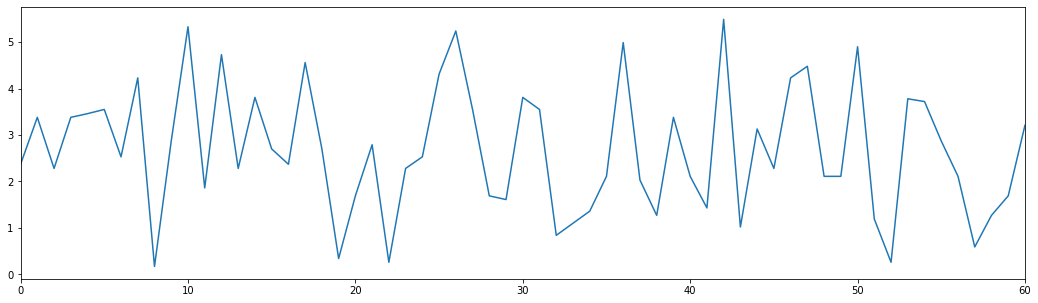

In [115]:
df["Alter"].plot(figsize=(18,5))

Checking for any missing values
The “False” output confirms that there are no null values in the dataframe.

In [116]:
df.isnull().values.any()

False

In [117]:
alt.Chart(df, title="Histogram").mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).repeat(
    row=['KM','Alter'],
    column=['Preis','Alter']
)

alt.RepeatChart(...)

In [118]:
alt.Chart(df, title="Frequency Histogram").mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative',bin=True),
     y='count()',
    color='species:N'
).repeat(
    column=['Preis','Alter','KM']
)

alt.RepeatChart(...)

Linear Regression

In [119]:
chart = alt.Chart(df, title="Linear Regression").mark_point().encode(
    x='Alter',
    y='Preis'
)#.interactive()
chart

alt.Chart(...)

In [120]:
chart + chart.transform_regression('Alter', 'Preis',method="linear").mark_line(color="red")

alt.LayerChart(...)

Boxplot

Text(0.5, 1.0, 'Boxplot of Preis')

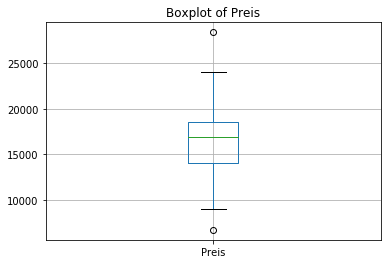

In [121]:
df.boxplot(column=['Preis'])
title_boxplot = 'Boxplot of Preis'
plt.title( title_boxplot )

Meadian of the variable KM

In [122]:
df["KM"].median()


35900.0

Standart deviation of the variable Alter

In [123]:
df["Alter"].std()

1.3760751980977175

variation of coefficient 

In [124]:
vPreis = df["Preis"].std()/df["Preis"].mean()
vAlter = df["Alter"].std()/df["Alter"].mean()
vKM = df["KM"].std()/df["KM"].mean()

print("vPreis: "+str(vPreis)+"\nvAlter: "+str(vAlter)+"\nvKM: "+str(vKM))

vPreis: 0.2496774376273966
vAlter: 0.5141213149014562
vKM: 0.7974182548215634


Correlation Map:

In [125]:
corr = df[["Preis","Alter","KM"]].corr()
#pandas
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Preis,Alter,KM
Preis,1,-0.94,-0.85
Alter,-0.94,1,0.83
KM,-0.85,0.83,1


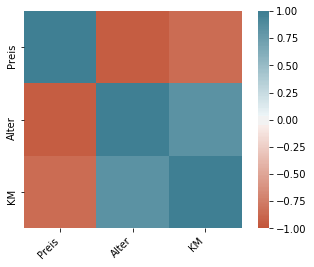

In [126]:
#seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [127]:
#file = r'~/CAS_DA/regression/fallbeispiel_test/Autopreise.xlsx'
autos = pd.read_excel(file)
autos['Alter'] = autos['Alter'].str.replace(',', '.').astype(float).astype(float)

# 4. Skalierungen
### 4.1 Definieren Sie folgende drei neuen Variablen:

#Hinweis: Diese Transformationen sind nicht sinnvoll und dienen nur dem Umgang mit verschiedenen Skalierungen.

#### 4.1.1 **Preis100** = Preis/100: gibt den Preis in Einheiten von CHF 100 an.
autos.insert(4, 'Preis100', autos['Preis'] / 100)

#### 4.1.2 **PreisUSD**: gibt den Preis in USD mittels Wechselkurs CHF/USD 1.10 an.
autos.insert(5, 'PreisUSD', autos['Preis'] * 1.10)
 
# #### 4.1.3 **KM1000** = KM/1000: gibt die km-Zahl in Einheiten von 1000 km an.
autos.insert(6, 'KM1000', autos['KM'] / 1000)

### 4.2 Vergleichen Sie die Standardabweichungen und Variationskoeffizienten für folgende Gruppenvariablen: (Preis, Preis100, PreisUSD) und (KM, KM1000). Was stellen Sie fest?

sdPreis = autos.loc[:,"Preis"].std()   # Standardabweichung vom Preis
sdPreis100 = autos.loc[:,"Preis100"].std()      # Standardabweichung vom Preis100
sdPreisUSD = autos.loc[:,"PreisUSD"].std()

vPreis = sdPreis/autos.loc[:,"Preis"].mean() # Variationskoeffizient vom Preis
vPreis100 = sdPreis100/autos.loc[:,"Preis100"].mean()
vPreisUSD = sdPreisUSD/autos.loc[:,"PreisUSD"].mean()

sdKM = autos.loc[:,"KM"].std() # Standardabweichung
sdKM1000 = autos.loc[:,"KM1000"].std()
vKM = sdKM/autos.loc[:,"KM"].mean()
vKM1000 = sdKM1000/autos.loc[:,"KM1000"].mean()
 
Std_Abw = np.array([sdPreis, sdPreis100, sdPreisUSD, sdKM, sdKM1000])
Var_koeff = np.array([vPreis, vPreis100, vPreisUSD, vKM, vKM1000])
Variablen = np.array(["Preis", "Preis100", "PreisUSD", "KM", "KM1000"])

dt = pd.DataFrame({'Variablen': Variablen, 'Std_Abw': Std_Abw, 'Var_koeff': Var_koeff})
dt
#Der Variationskoeffizient ist nominiert


### 4.3 Schiefe und Kurtosis
#### Vergleichen Sie die Schiefe und Kurtosis folgender Gruppenvariablen: (Preis, Preis100, PreisUSD) und (KM, KM1000).

sPreis = autos.loc[:,"Preis"].skew()              # Schiefe vom Preis
sPreis100 = autos.loc[:,"Preis100"].skew() 
sPreisUSD = autos.loc[:,"PreisUSD"].skew() 

sKM = autos.loc[:,"KM"].skew() 
sKM1000 = autos.loc[:,"KM1000"].skew() 

Schiefe = np.array([sPreis, sPreis100, sPreisUSD, sKM, sKM1000])

kPreis = autos.loc[:,"Preis"].kurtosis()                 # Kurtosis
kPreis100 = autos.loc[:,"Preis100"].kurtosis()
kPreisUSD = autos.loc[:,"PreisUSD"].kurtosis()
kKM = autos.loc[:,"KM"].kurtosis()   
kKM1000 = autos.loc[:,"KM1000"].kurtosis()  
Exzess = np.array([kPreis, kPreis100, kPreisUSD, kKM, kKM1000])

Variablen = np.array(["Preis", "Preis100", "PreisUSD", "KM", "KM1000"])

result = pd.DataFrame({'Schiefe': Schiefe, 'Exzess': Exzess, 'Variablen': Variablen})
result



### 4.5 Berechnen Sie die Schiefe und Kurtosis folgender Variablen: *Preis, Alter und KM*  

sPreis = autos.loc[:,"Preis"].skew()      
sAlter = autos.loc[:,"Alter"].skew() 
sKM = autos.loc[:,"KM"].skew() 

kPreis = autos.loc[:,"Preis"].kurtosis()        
kAlter = autos.loc[:,"Alter"].kurtosis()                 # Kurtosis# Kurtosis
kKM = autos.loc[:,"KM"].kurtosis()   

Schiefe = np.array([sPreis, sAlter, sKM])
Exzess = np.array([kPreis, kAlter, kKM])
 
Var2 = np.array(["Preis", "Alter", "KM"])

result = pd.DataFrame({'Var2': Var2, 'Schiefe': Schiefe, 'Exzess': Exzess})
result

### 4.6 Charakterisieren Sie Ihre Ergebnisse (rechtschief, linkschief oder symmetrisch?)  
# Alle drei Verteilungen sind rechtsschief, da wir positive Werte bekommen.  
# Begründung: Diese Variablen können nur positive Werte annehmen und können auch hohe Werte (insbesondere KM) aufweisen.*


### 4.7. Bei rechtschiefen Verteilungen haben wir i.d.R. die Relation Median < Mittelwert.   
### Prüfen Sie diese Lage für die Variablen Preis, Alter und KM.

mPreis = autos.loc[:,"Preis"].mean()
mAlter = autos.loc[:,"Alter"].mean()
mKM = autos.loc[:,"KM"].mean()

medianPreis = autos.loc[:,"Preis"].median()
medianAlter = autos.loc[:,"Alter"].median()
medianKM = autos.loc[:,"KM"].median()

Mean = np.array([mPreis, mAlter, mKM])
Median = np.array([medianPreis, medianAlter, medianKM])

Variablen = np.array(["Preis", "Alter", "KM"])
result = pd.DataFrame({'Variablen': Variablen, 'Median': Median, 'Mean': Mean})
result

# Diese Relation gilt als Faustregel und kann Ausnahmen wie in diesem Bsp. für die Variable *Preis*.   
# Grundsätzlich stimmt diese Überschlagsrechnung aber.

### 4.8. Interpretieren Sie konkret die (Exzess)-Kurtosis für *Preis und KM*.

#Exzess-Kurtosis < 0 --> diese Verteilungen sind steilgipflig, d.h.sie haben mehr Ausreisser als die Normalverteilung.
  

,Variablen,Median,Mean
0,Preis,16900.00,16140.163934
1,Alter,2.53,2.676557
2,KM,35900.00,53367.721311


In [128]:
# 5. Regressionen
### Schätzen Sie folgende Regressionsmodelle: 

### 5.1 Modell 1:  Preis = b~0~ + b~1~Alter + u
lm1 = smf.ols(formula='Preis ~ Alter', data=autos).fit()
print(lm1.summary())

### 5.1.1 Interpretieren Sie konkret den Regressionskoeffizienten b~Alter~ .

#Modell 1: Preis = 23‘521.5 – 2‘757.77 Alter
#Interpretation:** Der durchschnittliche Autopreis reduziert sich um 2'757.77 CHF pro Jahr.


                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     462.2
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           1.34e-29
Time:                        08:30:53   Log-Likelihood:                -525.99
No. Observations:                  61   AIC:                             1056.
Df Residuals:                      59   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.352e+04    385.394     61.032      0.0

In [129]:
### 5.2 Modell 2: Preis = b~0~ + b~1~Alter + b~2~Km + u

lm2 = smf.ols(formula='Preis ~ Alter + KM', data=autos).fit()
print(lm2.summary())


### 5.2.1 Interpretieren Sie konkret den Regressionskoeffizienten b~Alter~ (Modell 2).
#Modell 2: Preis = 23‘183.6 – 2‘202.77 Alter – 0.0215 KM

#Interpretation:** Der durchschnittliche jährliche Preisrückgang eines Gebrauchtautos beträgt CHF 2'202.77F, wenn der Kilometerstand konstant bleibt (c.p).

###  5.2.2. Interpretieren Sie konkret den Regressionskoeffizienten b~KM~ (Modell 2).

#Interpretation: **Der erwartete Wertverlust pro gefahrenen KM beträgt ca. 2.15 Rappen beim gleich bleibendem Alter (c.p.).


###  5.2.3 Sind die Regressionskoeffizienten (Modell) statistisch signifikant? Betrachten Sie dabei jeweils die Sternchen und die t-Werte.
#**Interpretation:**  
 # * Die Koeffizienten Alter und KM sind statistisch hoch signifikant mit drei Sterne (hoch signifikant) bzw. zwei Sterne (0.001 -> signifikant) 
 # * Alle t-Werte sind als absoluter Wert grösser als 2 ((Daumregel) und somit kann H0 verworfen werden. 
 # * Pr(>|t|)-Werte sind unter 5% somit kann H0 verworfen werden.


                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.87e-30
Time:                        08:30:53   Log-Likelihood:                -521.46
No. Observations:                  61   AIC:                             1049.
Df Residuals:                      58   BIC:                             1055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.318e+04    377.445     61.423      0.0

In [130]:
###  5.2.4 Warum ist ein Unterschied für den Schätzer b~2~ zwischen beiden Modellen zu vermerken?
#TODO compareCoefs(lm1, lm2)
#Kilometerstand und Preis sind hoch korreliert. Wenn der Kilometerstand nicht im Modell als Regressor berücksichtigt wird, kommt im Regressionskoeffizienten für das Alter im Modell 1 auch auf indirekter Weise der Kilometerstandseffekt zum Ausdruck. Wenn im Modell 2 der Kilometerstand aber als zusätzlicher Regressor berücksichtigt wird, wird dieser Effekt ‘kontrolliert’, d.h. der Regressionskoeffizient des Alters misst dann den jährlichen durchschnittlichen Wertverlust bei konstanter Kilometerzahl.

lm1.params


Intercept    23521.483921
Alter        -2757.766394
dtype: float64

In [131]:
###  5.2.5 Ermitteln Sie den erwarteten Preis eines Gebrauchtautos mit einem Alter von 4 Jahren und 50‘000 Km.
erw_preis = 23183.61-2202.77*4-0.0215*50000
print(erw_preis)

13297.53


In [132]:
###  5.3. Schätzen Sie das  Modell 3: Preis = b~0~* + b~1~* Alter + b~2~* KM1000 + u*
lm3 = smf.ols(formula='Preis ~ Alter + KM1000', data=autos).fit()
print(lm3.params)

###  5.3.1. Interpretieren Sie konkret den Koeffizienten b~2~ im Modell 3.
#Interpretation:** Nimmt der Kilometerstand um eine Einheit (1'000 KM) zu, so ist ein Preisrückgang von ca. CHF 21.50 zu erwarten, c.p.
#Der erwartete Wertverlust eines Gebrauchtswagens pro Tausend Kilometer beträt ca CHF 21.50, ceteris paribus (c.p.)




Intercept    23183.612753
Alter        -2202.768082
KM1000         -21.503891
dtype: float64


In [133]:
###  5.3.2. Prüfen Sie den Zusammenhang zwischen b~2~ (Modell 2) und b~2~* (Modell 3).
#Regressionsmodelle:
#Modell 2: Preis = 23'180 -2'203 Alter –0.02150 KM
#Modell 3: Preis = 231.8 -22.03 Alter –0.0002150 KM1000
#b~3~* = -0.0002150 = b~3~/1000 = -0.02150/1000<br>

(round(lm2.params['KM'], 8) == round(lm3.params['KM1000']/1000, 8))
#round(coef(lm2)[3],8)==round(coef(lm3)[3]/1000,8)


True

In [134]:
###  5.4. Schätzen Sie das  Modell 4: Preis100 = b~0~* + b~1~* Alter + b~2~* KM + u*
lm4 = smf.ols(formula='Preis100 ~ Alter + KM', data=autos).fit()
print(lm4.summary())

###  5.4.1. Interpretieren Sie konkret die Koeffizienten b~Alter~ und b~KM~ im Modell 4.

#**Interpretation:**<br>
#b~Alter~: Der Autopreis sinkt pro Jahr im Durchschnitt um 22.03 hundert Franken bzw. um 22.03 * 100 = CHF 2'203 ceteris paribus. (c.p.)
#b~KM~: Nimmt der Kilometerstand um eine Einheit (1 km) zu, so ist ein Preisrückgang von ca. 0.000215 * 100 = CHF 0.0215 zu erwarten c.p.

###  5.4.2 Prüfen Sie den Zusammenhang zwischen b~i~ und b~i~* für i = 0, 1,2 (Modell 2 vs Modell 4).

#Regressionsmodelle:  
#Modell 2: Preis = 23'180 -2'203 Alter –0.02150 KM
#Modell 4: Preis100 = 231.8 -22.03 Alter –0.0002150 KM
#b~0~* = 231.8 = b~0~/100 = 23‘183.6/100
print(round(lm2.params['Intercept'], 8) == round(lm4.params['Intercept'] * 100, 8))
print(round(lm2.params['Alter'], 8) == round(lm4.params['Alter'] * 100, 8))
print(round(lm2.params['KM'], 8) == round(lm4.params['KM'] * 100, 8))

#TODO CompareCoefs lm2 lm4


###  5.5. Schätzen Sie das  Modell 5: PreisUSD = b~0~* + b~1~* Alter + b~2~* KM + u*
lm5 = smf.ols(formula='PreisUSD ~ Alter + KM', data=autos).fit()
print(lm5.summary())

####  5.5.1. Prüfen Sie den Zusammenhang zwischen b~i~ (Modell 2) und b~i~* (Modell 5) für i = 0,1,2.

#Regressionsmodelle:  
#Modell 2: Preis = 23'180 -2'203 Alter –0.02150 KM
#Modell 5: PreisUSD = 25'500 -2'423 Alter –0.02365 KM

#TODO: compareCoefs(lm2, lm5)

#b~1~* = 25‘501 = b~1~ x 1.10 = 23‘183.6 x 1.10
print(round(lm2.params['Intercept'], 8) == round(lm5.params['Intercept'] / 1.1, 8))
print(round(lm2.params['Alter'], 8) == round(lm5.params['Alter'] / 1.1, 8))
print(round(lm2.params['KM'], 8) == round(lm5.params['KM'] / 1.1, 8))

                            OLS Regression Results                            
Dep. Variable:               Preis100   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.87e-30
Time:                        08:30:53   Log-Likelihood:                -240.54
No. Observations:                  61   AIC:                             487.1
Df Residuals:                      58   BIC:                             493.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    231.8361      3.774     61.423      0.0

In [135]:
###  5.6. Schätzen Sie das  Modell 6: Preis100 = b~0~' + b~1~' Alter + b~2~' KM1000 + u'
lm6 = smf.ols(formula='Preis100 ~ Alter + KM1000', data=autos).fit()
print(lm6.summary())


####  5.6.1. Interpretieren Sie konkret den Regressionskoeffizienten b~2~'
#**Interpretation:** Nimmt der Kilometerstand um eine Einheit (1000km) zu, so ist ein Preisrückgang von CHF 0.2150 * 100 = CHF 21.50 zu erwarten. Unter der Voraussetzung, dass 2b gleich bleibt.

####  5.6.2. Prüfen Sie den Zusammenhang zwischen b~i~ und b~i~' für i = 0,1,2. (Modell 2 vs Modell 6)

#Regressionsmodelle:  
#Modell 2: Preis = 23'180 -2'203 Alter –0.02150 KM
#Modell 6: Preis100 = 231.83613 -22.02768 Alter –0.21504 KM1000

#b~0~' = 231.83 = b~0~ / 1.10 = 23‘183.6 /100
#print(lm2.params['Intercept'])
#print(lm6.params['Intercept'])
print(round(lm2.params['Intercept'], 7) == round(lm6.params['Intercept']*100, 7))
print(round(lm2.params['Alter'], 8) == round(lm6.params['Alter'] * 100, 8))
print(round(lm2.params['KM'], 8) == round(lm6.params['KM1000'] * 100 / 1000, 8))




                            OLS Regression Results                            
Dep. Variable:               Preis100   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           4.87e-30
Time:                        08:30:53   Log-Likelihood:                -240.54
No. Observations:                  61   AIC:                             487.1
Df Residuals:                      58   BIC:                             493.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    231.8361      3.774     61.423      0.0

In [149]:
test = pd.DataFrame(data=[lm2.predict(), lm2.resid])
test.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,16969.572636,13746.996332,17408.665342,14168.472595,13747.106792,12407.001055,17116.020013,12296.119725,22770.435176,15990.760773,...,20454.79928,22503.373597,10814.417903,13376.523665,14926.318171,17353.058097,21851.723748,20031.283088,18830.870689,14899.907759
1,20.427364,253.003668,591.334658,331.527405,352.893208,1072.998945,883.979987,53.880275,1129.564824,-90.760773,...,-1154.79928,296.626403,-814.417903,-1026.523665,-476.318171,-453.058097,-1871.723748,-31.283088,-330.870689,-899.907759


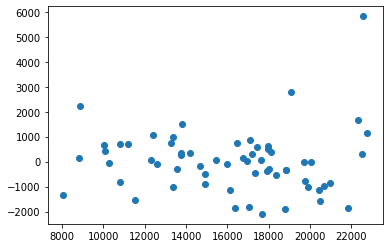

In [150]:
#6
#Residuengraph nach dem Beobachtungsindex
plt.scatter(lm2.predict(), lm2.resid)

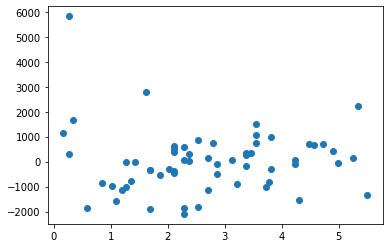

In [141]:
#Residuengraph gegen *Alter*
plt.scatter(df['Alter'], lm2.resid)

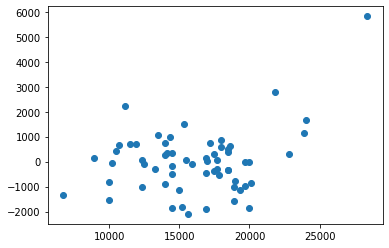

In [151]:
#Residuengraph gegen *Preis* 
plt.scatter(df['Preis'], lm2.resid)

([array([ 0.,  0.,  0.,  0.,  6.,  7., 11., 14., 14.,  9.]),
  array([43., 17.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([-2094.66709172,   391.84313501,  2878.35336173,  5364.86358846,
         7851.37381519, 10337.88404191, 12824.39426864, 15310.90449537,
        17797.41472209, 20283.92494882, 22770.43517555]),
 <a list of 2 Lists of Patches objects>)

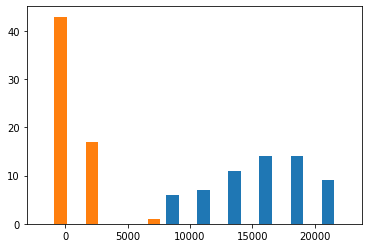

In [156]:
# Histogramm der Residuen
plt.hist((lm2.predict(), lm2.resid), bins = 10)

In [157]:
from statsmodels.stats.stattools import jarque_bera 

In [159]:
jarque_bera(lm2.resid)
#The output gives you; the test stat, the p value, skew, kurtosis in that order.
#n > 2000 for the Jarque Bera test to be valid

(120.05422397059324,
 8.522293762364844e-27,
 1.6098513110033625,
 9.071899521661932)